In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from fatFunctions import fat_init, fat
from parameters import Index
p = fat_init()

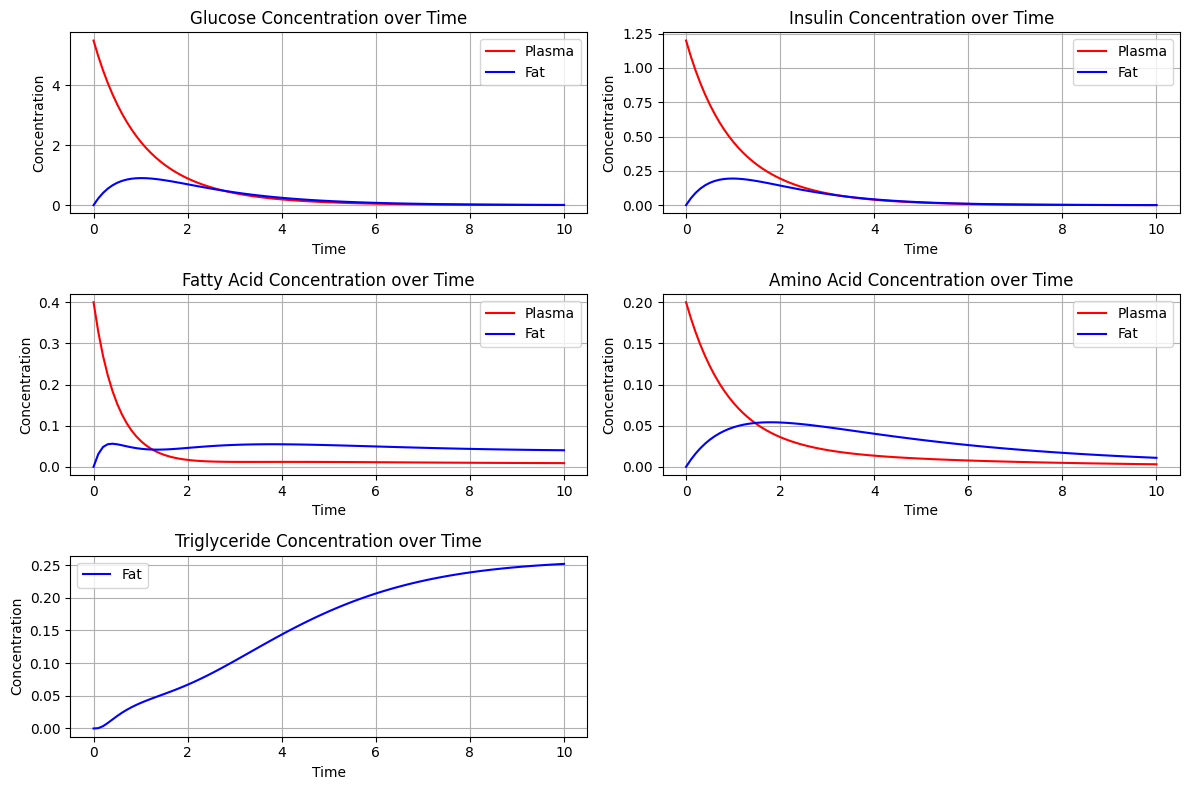

In [6]:

# TRY NUMPY.RAND
# check metabolical for ROS generation
# beta oxidation of fatty acids
#
n = len(Index) 
y0 = np.zeros(n)
y0[Index.plasma_glucose] = 5.5 #gmmol
y0[Index.plasma_insulin] = 1.2 #g/L
y0[Index.plasma_fattyacid] = 0.4 #mmol/L
y0[Index.plasma_aminoacid] = 0.2 #mmol/L


t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)


solution = solve_ivp(fun=lambda t, y: fat(t, y, p, n),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')

timespan = solution.t   
glucoseplasma = solution.y[Index.plasma_glucose]
glucosefat = solution.y[Index.subq_glucose]
triglycerides = solution.y[Index.subq_TAG]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(timespan, glucoseplasma, label='Plasma', color='red')
plt.plot(timespan, glucosefat, label='Fat', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Glucose Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(timespan, solution.y[Index.plasma_insulin], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.subq_insulin], label='Fat', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Insulin Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(timespan, solution.y[Index.plasma_fattyacid], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.subq_fattyacid], label='Fat', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fatty Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(timespan, solution.y[Index.plasma_aminoacid], label='Plasma', color='red')
plt.plot(timespan, solution.y[Index.subq_aminoacid], label='Fat', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Amino Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(timespan, triglycerides, label='Fat', color='blue')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Triglyceride Concentration over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

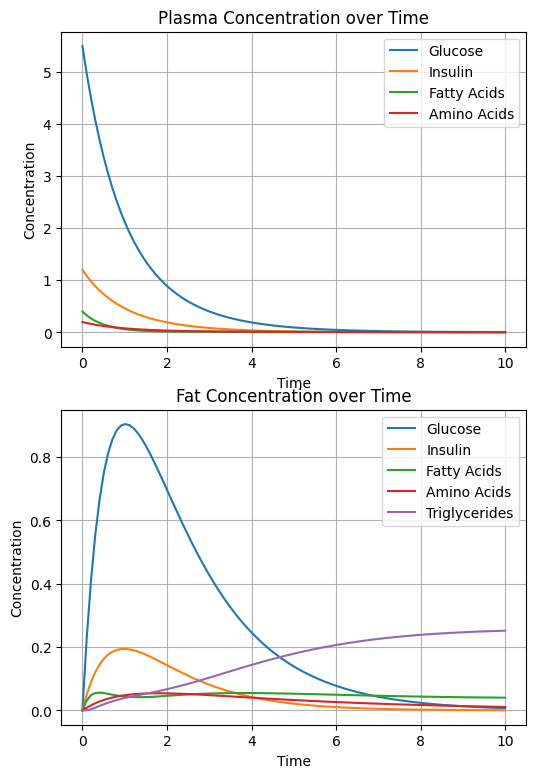

In [7]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[Index.plasma_glucose], label='Glucose')
plt.plot(timespan, solution.y[Index.plasma_insulin], label='Insulin')
plt.plot(timespan, solution.y[Index.plasma_fattyacid], label='Fatty Acids')
plt.plot(timespan, solution.y[Index.plasma_aminoacid], label='Amino Acids')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Plasma Concentration over Time')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(timespan, solution.y[Index.subq_glucose], label='Glucose')
plt.plot(timespan, solution.y[Index.subq_insulin], label='Insulin')
plt.plot(timespan, solution.y[Index.subq_fattyacid], label='Fatty Acids')
plt.plot(timespan, solution.y[Index.subq_aminoacid], label='Amino Acids')
plt.plot(timespan, solution.y[Index.subq_TAG], label='Triglycerides')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fat Concentration over Time')
plt.legend()
plt.grid(True)

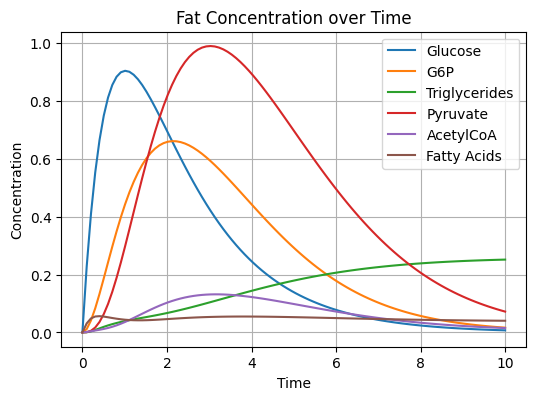

In [8]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[Index.subq_glucose], label='Glucose')
plt.plot(timespan, solution.y[Index.subq_G6P], label='G6P')
plt.plot(timespan, solution.y[Index.subq_TAG], label='Triglycerides')
plt.plot(timespan, solution.y[Index.subq_pyruvate], label='Pyruvate')
plt.plot(timespan, solution.y[Index.subq_ACoA], label='AcetylCoA')
plt.plot(timespan, solution.y[Index.subq_fattyacid], label='Fatty Acids')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fat Concentration over Time')
plt.legend()
plt.grid(True)


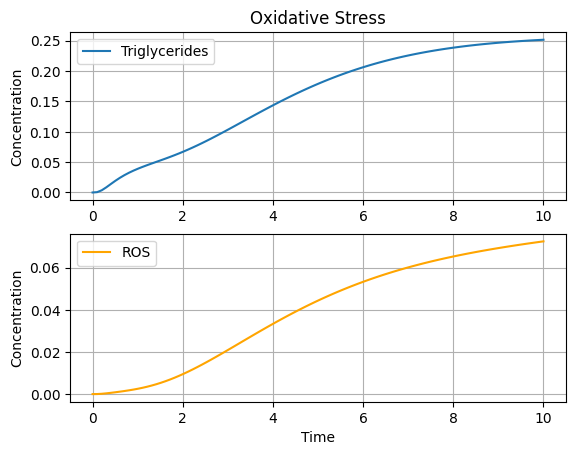

In [12]:
plt.subplot(2, 1, 1)
plt.plot(timespan, solution.y[Index.subq_TAG], label='Triglycerides')


plt.ylabel('Concentration')
plt.title('Oxidative Stress')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)

plt.plot(timespan, solution.y[Index.subq_ROS], label='ROS', color='orange')
plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.grid(True)